In [75]:

from sklearn.metrics import accuracy_score, precision_score, recall_score



In [98]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline



In [2]:
df = pd.read_csv('/Users/ashwinrajh/Desktop/Programming/Final Projects/Project3_Revenue Prediction/marketing_data_1 - marketing_data_1.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [6]:

categorical_columns = ['Education', 'Marital_Status', 'Country']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col + '_Encoded'] = label_encoder.fit_transform(df[col])

df = df.drop(categorical_columns, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      2240 non-null   int64 
 1   Year_Birth              2240 non-null   int64 
 2   Income                  2216 non-null   object
 3   Kidhome                 2240 non-null   int64 
 4   Teenhome                2240 non-null   int64 
 5   Dt_Customer             2240 non-null   object
 6   Recency                 2240 non-null   int64 
 7   MntWines                2240 non-null   int64 
 8   MntFruits               2240 non-null   int64 
 9   MntMeatProducts         2240 non-null   int64 
 10  MntFishProducts         2240 non-null   int64 
 11  MntSweetProducts        2240 non-null   int64 
 12  MntGoldProds            2240 non-null   int64 
 13  NumDealsPurchases       2240 non-null   int64 
 14  NumWebPurchases         2240 non-null   int64 
 15  NumC

In [10]:
df.isnull().sum()


ID                         0
Year_Birth                 0
Income                    24
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Response                   0
Complain                   0
Education_Encoded          0
Marital_Status_Encoded     0
Country_Encoded            0
dtype: int64

In [13]:
df['Income'] = pd.to_numeric(df['Income'].replace('[\$,]', '', regex=True), errors='coerce')


In [14]:
df.isnull().sum()


ID                         0
Year_Birth                 0
Income                    24
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Response                   0
Complain                   0
Education_Encoded          0
Marital_Status_Encoded     0
Country_Encoded            0
dtype: int64

In [15]:
df['Income'] = df['Income'].fillna(0).astype(int)


In [16]:
df.isnull().sum()


ID                        0
Year_Birth                0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Response                  0
Complain                  0
Education_Encoded         0
Marital_Status_Encoded    0
Country_Encoded           0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      2240 non-null   int64 
 1   Year_Birth              2240 non-null   int64 
 2   Income                  2240 non-null   int64 
 3   Kidhome                 2240 non-null   int64 
 4   Teenhome                2240 non-null   int64 
 5   Dt_Customer             2240 non-null   object
 6   Recency                 2240 non-null   int64 
 7   MntWines                2240 non-null   int64 
 8   MntFruits               2240 non-null   int64 
 9   MntMeatProducts         2240 non-null   int64 
 10  MntFishProducts         2240 non-null   int64 
 11  MntSweetProducts        2240 non-null   int64 
 12  MntGoldProds            2240 non-null   int64 
 13  NumDealsPurchases       2240 non-null   int64 
 14  NumWebPurchases         2240 non-null   int64 
 15  NumC

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: int(x.timestamp()))


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      2240 non-null   int64
 1   Year_Birth              2240 non-null   int64
 2   Income                  2240 non-null   int64
 3   Kidhome                 2240 non-null   int64
 4   Teenhome                2240 non-null   int64
 5   Dt_Customer             2240 non-null   int64
 6   Recency                 2240 non-null   int64
 7   MntWines                2240 non-null   int64
 8   MntFruits               2240 non-null   int64
 9   MntMeatProducts         2240 non-null   int64
 10  MntFishProducts         2240 non-null   int64
 11  MntSweetProducts        2240 non-null   int64
 12  MntGoldProds            2240 non-null   int64
 13  NumDealsPurchases       2240 non-null   int64
 14  NumWebPurchases         2240 non-null   int64
 15  NumCatalogPurchases  

In [33]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Education_Encoded,Marital_Status_Encoded,Country_Encoded
0,1826,1970,84835,0,0,1402876800,0,189,104,379,...,0,0,0,0,0,1,0,2,2,6
1,1,1961,57091,0,0,1402790400,0,464,5,64,...,0,0,0,0,1,1,0,2,4,1
2,10476,1958,67267,0,1,1399939200,0,134,11,59,...,0,0,0,0,0,0,0,2,3,7
3,1386,1967,32474,1,1,1399766400,0,10,0,1,...,0,0,0,0,0,0,0,2,5,0
4,5371,1989,21474,1,0,1396915200,0,6,16,24,...,1,0,0,0,0,1,0,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476,0,1,1362614400,99,372,18,126,...,0,0,0,0,0,0,0,4,2,7
2236,5263,1977,31056,1,0,1358812800,99,5,10,13,...,0,0,0,0,0,0,0,0,3,6
2237,22,1976,46310,1,0,1354492800,99,185,2,88,...,0,0,0,0,0,0,0,2,2,6
2238,528,1978,65819,0,0,1354147200,99,267,38,701,...,0,0,0,0,0,0,0,2,3,3


In [64]:
df.corr()['MntWines'].abs().sort_values(ascending=False)

MntWines                  1.000000
NumStorePurchases         0.642100
NumCatalogPurchases       0.635226
Income                    0.570851
MntMeatProducts           0.562667
NumWebPurchases           0.542265
Kidhome                   0.496297
AcceptedCmp5              0.472613
MntFishProducts           0.399753
MntFruits                 0.389637
MntGoldProds              0.387516
MntSweetProducts          0.386581
AcceptedCmp4              0.373286
AcceptedCmp1              0.354133
NumWebVisitsMonth         0.320653
Response                  0.247254
AcceptedCmp2              0.205907
Education_Encoded         0.197576
Dt_Customer               0.166264
Year_Birth                0.157773
AcceptedCmp3              0.062202
Complain                  0.039007
ID                        0.022878
Recency                   0.016064
Country_Encoded           0.015581
NumDealsPurchases         0.010940
Marital_Status_Encoded    0.008205
Teenhome                  0.004846
Name: MntWines, dtyp

In [65]:
k = 20
top_features = df.corr()['MntWines'].abs().sort_values(ascending=False).head(k).index
top_features

Index(['MntWines', 'NumStorePurchases', 'NumCatalogPurchases', 'Income',
       'MntMeatProducts', 'NumWebPurchases', 'Kidhome', 'AcceptedCmp5',
       'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts',
       'AcceptedCmp4', 'AcceptedCmp1', 'NumWebVisitsMonth', 'Response',
       'AcceptedCmp2', 'Education_Encoded', 'Dt_Customer', 'Year_Birth'],
      dtype='object')

In [66]:
df_selected = df[top_features]

In [82]:
df_selected

,MntWines,NumStorePurchases,NumCatalogPurchases,Income,MntMeatProducts,NumWebPurchases,Kidhome,AcceptedCmp5,MntFishProducts,MntFruits,MntGoldProds,MntSweetProducts,AcceptedCmp4,AcceptedCmp1,NumWebVisitsMonth,Response,AcceptedCmp2,Education_Encoded,Dt_Customer,Year_Birth
0,189,6,4,84835,379,4,0,0,111,104,218,189,0,0,1,1,0,2,1402876800,1970
1,464,7,3,57091,64,7,0,0,7,5,37,0,0,0,5,1,1,2,1402790400,1961
2,134,5,2,67267,59,3,0,0,15,11,30,2,0,0,2,0,0,2,1399939200,1958
3,10,2,0,32474,1,1,1,0,0,0,0,0,0,0,7,0,0,2,1399766400,1967
4,6,2,1,21474,24,3,1,0,11,16,34,0,0,0,7,1,0,2,1396915200,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,372,11,2,66476,126,5,0,0,47,18,78,48,0,0,4,0,0,4,1362614400,1976
2236,5,3,0,31056,13,1,1,0,3,10,16,8,0,0,8,0,0,0,1358812800,1977
2237,185,5,1,46310,88,6,1,0,15,2,14,5,0,0,8,0,0,2,1354492800,1976
2238,267,10,4,65819,701,5,0,0,149,38,63,165,0,0,3,0,0,2,1354147200,1978


In [85]:
correlation_matrix = df_selected.corr()

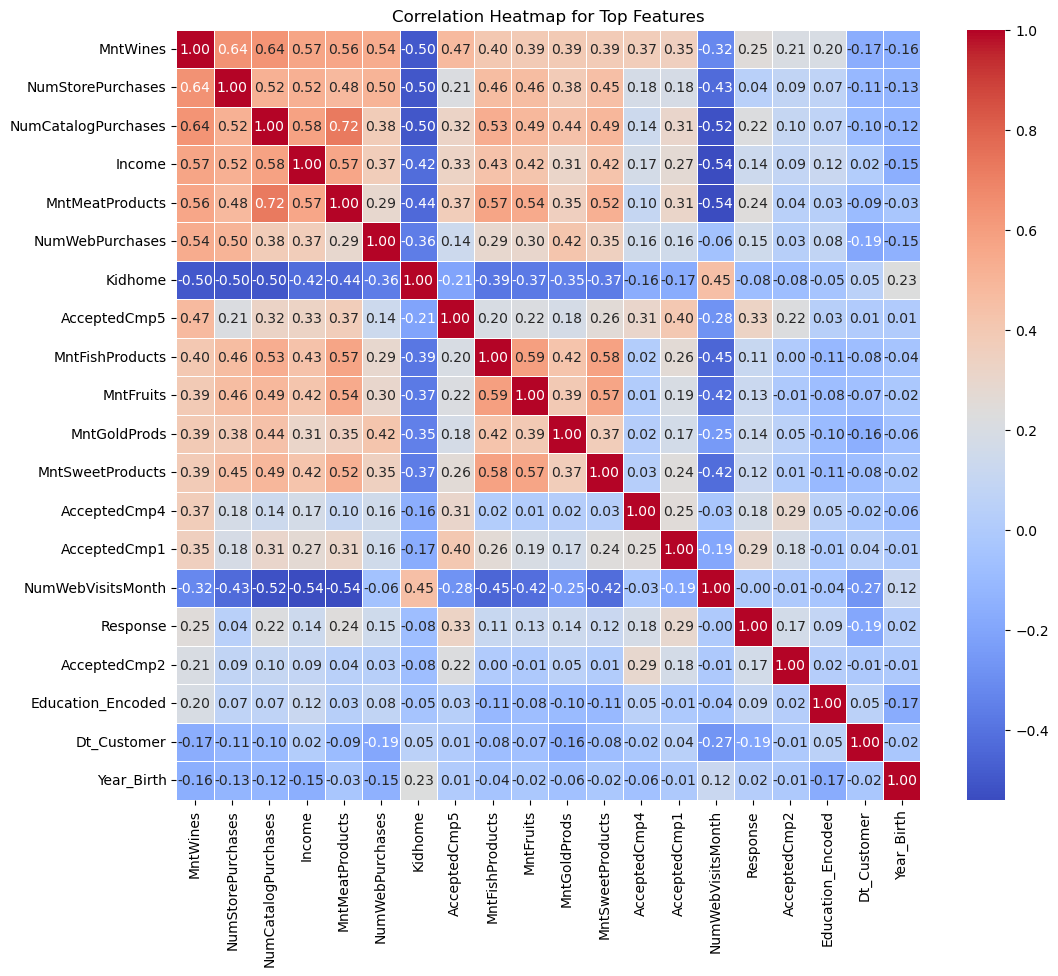

In [87]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Top Features')
plt.show()

In [68]:
X = df_selected.drop('MntWines', axis = 1).values
Y = df_selected['MntWines'].values

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

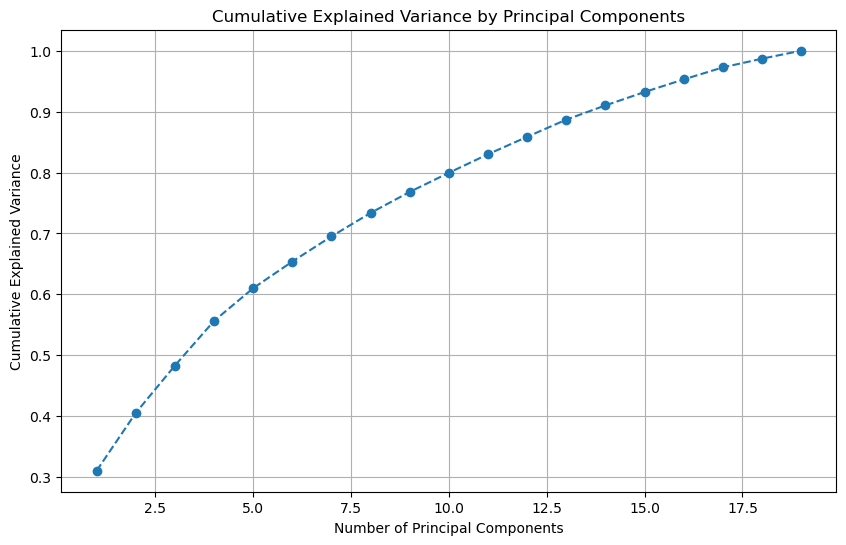

In [70]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [76]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_for_95_variance = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to retain 95% variance:", num_components_for_95_variance)

Number of components to retain 95% variance: 16


In [77]:
X_selected_pca = X_pca[:, :num_components_for_95_variance]

In [99]:
ridge_model = Ridge(alpha=0.1)  
k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_selected_pca):
    X_train, X_test = X_selected_pca[train_index], X_selected_pca[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

min_mse = min(mse_scores)
min_rmse = min(rmse_scores)
max_r2 = max(r2_scores)

print(f'Mean Squared Error (MSE): {min_mse}')
print(f'Root Mean Squared Error (RMSE): {min_rmse}')
print(f'R-Square Score: {max_r2}')
#Ridge Regression with PCA Framework

Mean Squared Error (MSE): 32991.81014788292
Root Mean Squared Error (RMSE): 181.6364780210267
R-Square Score: 0.7214098517938757


In [94]:
#SVR
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

hyper_params = {
    'svr__C': np.linspace(1, 100, 20),
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [2, 3, 4],
}

mysteps = [('ss', StandardScaler()), ('svr', SVR())]
m_pipe = Pipeline(steps=mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions=hyper_params, cv=kf, scoring='neg_mean_squared_error')

rcv.fit(X_selected_pca, Y)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                                        'svr__degree': [2, 3, 4],
                                        'svr__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   scoring='neg_mean_squared_error')

In [95]:
best_model = rcv.best_estimator_

y_pred = cross_val_predict(best_model, X_selected_pca, Y, cv=kf)

mse = mean_squared_error(Y, y_pred)

rmse = np.sqrt(mse)

r_squared = r2_score(Y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Square Score: {rmse}')


Mean Squared Error (MSE): 37386.659337824356
Root Mean Squared Error (RMSE): 193.35630152085645
R-Square Score: 193.35630152085645


In [96]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

hyper_params = {
    'decisiontreeregressor__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
    'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2']
}

mysteps = [('ss', StandardScaler()), ('decisiontreeregressor', DecisionTreeRegressor())]
m_pipe = Pipeline(steps=mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions=hyper_params, cv=kf, scoring='neg_mean_squared_error')

rcv.fit(X_selected_pca, Y)


/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/pipe

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('decisiontreeregressor',
                                              DecisionTreeRegressor())]),
                   param_distributions={'decisiontreeregressor__max_depth': [None,
                                                                             5,
                                                                             10,
                                                                             15,
                                                                             20],
                                        'decisiontreeregressor__max_features': ['auto',
                                                                                'sqrt',
                                                                                'log2'],
                                        'decisiontreeregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'decisiontreeregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10]},
                   scoring='neg_mean_squared_error')

In [97]:
best_model = rcv.best_estimator_

y_pred = cross_val_predict(best_model, X_selected_pca, Y, cv=kf)

mse = mean_squared_error(Y, y_pred)

rmse = np.sqrt(mse)

r_squared = r2_score(Y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Square Score: {rmse}')

Mean Squared Error (MSE): 48110.92391745198
Root Mean Squared Error (RMSE): 219.3420249688873
R-Square Score: 219.3420249688873
